# K-Means

## Make data set using sklearn

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
X,y = make_blobs(2000,centers = 3,random_state = 19)
X.shape

(2000, 2)

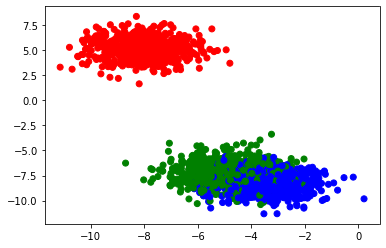

In [3]:
rgb = np.array(["r","g","b"])
plt.scatter(X[:,0],X[:,1],color = rgb[y])

## K-Means Clustering Algorithm : Sudo Code

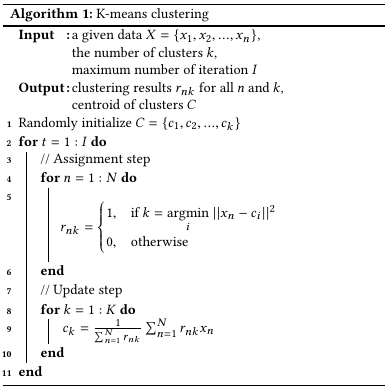

### Index
1. 랜덤하게 k개의 수만큼의 Centroid를 생성한다
2. 생성된 Centroid와 모든 데이터와의 거리를 잰다.
3. 가장 가까운 Cluster에 데이터를 할당한다.
4. Centroid를 업데이트 한다.
5. 다시 거리를 잰다.
6. N회 반복

## Python Code

first :  [[-7, 3], [0, -9], [-2, -2]]


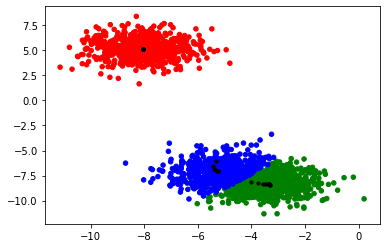

In [4]:
from collections import defaultdict

class K_Means():
    
    #Init
    def __init__(self,k,max_iter = 100):
        self.k = k
        self.max_iter = max_iter
        self.save_centroid_history = list() 
        
    #Save history
    def get_save_centroid_history(self):
        return self.save_centroid_history
    
    #Centroid의 초기값을 설정(Random)
    def init_Centroid(self,data):
        xy_max = np.max(data,axis = 0)
        xy_min = np.min(data,axis = 0)
        Centroids = list()
        for num in range(self.k):
            x = random.randint(int(xy_min[0]),int(xy_max[0]))
            y = random.randint(int(xy_min[1]),int(xy_max[1]))
            Centroids.append([x,y])
        return Centroids
    
    #calculate distance
    def get_dist(self,x1,y1,x2,y2):
        dist = ((x2-x1)**2 + (y2-y1)**2)**0.5
        return dist
    
    #make Cluster
    def Create_Cluster(self,Centroids,data):
        group = defaultdict(list)
        for point in data:
            distance = list()
            for Center in Centroids:
                dist = self.get_dist(point[0],point[1],Center[0],Center[1])
                distance.append(dist)
                cluster_num = np.argmin(distance)
                
            group[cluster_num].append(list([point[0],point[1]]))
            
        return group
    
    #각 그룹별로 Centroid를 Update함.
    def update_Centroid(self,cluster_group):
        Centroids = list()
        for group_num in range(self.k):
            cluster_point = np.array(cluster_group[group_num])
            new_Centroid = np.mean(cluster_point, axis = 0)
            self.save_centroid_history.append(list(new_Centroid))
            Centroids.append(new_Centroid)
        return Centroids
    
    #Centroid와 점사이의 거리가 멀 경우, Cluster에 단 한개의 데이터도 할당이 안되는 경우가 존재하면
    #다음 Centroid 업데이트때 nan값이 출력됨.
    def check_nan(self,cluster_group):
        for group in range(self.k):
            if cluster_group[group] == [] :
                print(cluster_group[group])
                return True
        else:
            return False
            
    #fitting
    def fit(self,data):
        
        centroid = self.init_Centroid(data)
        print("first : ", centroid)
        state = 1
        for loop in range(self.max_iter): 
            
            cluster_group = self.Create_Cluster(centroid,data)
            
            if self.check_nan(cluster_group):
                centroid = self.init_Centroid(data)
                print("new Centroid : ",centroid)
                continue
            centroid = self.update_Centroid(cluster_group)
        return cluster_group
    
    
def draw_graph(result,save_data):
    y = list()
    data = list()
    for i in range(3):
        data.extend(result[i])
        for j in range(len(result[i])):
            y.append(i)
    
    data = np.array(data)
    y = np.array(y)
    rgb = np.array(["r","g","b"])
    plt.scatter(data[:,0],data[:,1],color = rgb[y],s = 20)
    plt.scatter(np.array(save_data)[:,0],np.array(save_data)[:,1],color = 'black',s = 10)
    

if __name__ == '__main__':
    k_means = K_Means(k = 3,max_iter = 10)
    result = k_means.fit(X)
    save_data = k_means.get_save_centroid_history()
    draw_graph(result,save_data)

## Problem
1. 처음 Centroid를 Random하게 Choice하다보니 distance를 재고나서 Centroid에 속한 데이터가 하나도 없는 경우가 존재할 수 있음.  
--> (Solve) Check_nan function! + limit random range
2. 어이없는 실수 : if self.check_nan(cluster_group):를 적어야하는데 if self.check_nan만 적어서 update가 하나도 안됐음